In [2]:
import importlib
import module as mod
import numpy as np
import mltools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


importlib.reload(mod)
importlib.reload(mltools)

<module 'mltools' from '/Users/celian/Documents/Fac/M1/S2/ML/Projet/mltools.py'>

In [8]:

loss = mod.MSELoss()

batch_size = 10

X = np.random.randint(0, 2, (batch_size, 2))
y = np.random.randint(0, 2, (batch_size, 2))
y_hat = np.random.randint(0, 2, (batch_size, 2))

L = loss.forward(y, y_hat)

L_back = loss.backward(y, y_hat)

print(f'forward: {L.shape} backward: {L_back.shape}')


for y, y_hat, l, lb in zip(y,y_hat,L, L_back):
    print(y, y_hat, ' : ', l, lb)

forward: (10,) backward: (10, 2)
[0 1] [0 0]  :  0.5 [ 0 -2]
[0 1] [1 0]  :  1.0 [ 2 -2]
[0 0] [1 1]  :  1.0 [2 2]
[1 0] [0 1]  :  1.0 [-2  2]
[0 1] [0 1]  :  0.0 [0 0]
[0 0] [1 0]  :  0.5 [2 0]
[0 1] [1 1]  :  0.5 [2 0]
[0 1] [1 1]  :  0.5 [2 0]
[0 0] [1 0]  :  0.5 [2 0]
[0 1] [1 0]  :  1.0 [ 2 -2]


In [6]:

def train_reg(model, loss_fn, X, y, lr=0.1, batch_size=10, n_epochs=1000, verbose=True):
    losses = []
    for epoch in range(n_epochs):
        for i in range(0, X.shape[0], batch_size):
            model.zero_grad()
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            # Forward
            y_pred = model.forward(X_batch)
            loss = loss_fn.forward(y_batch, y_pred)
            mean_loss = np.mean(loss)
            losses.append(mean_loss)

            # Backward
            delta = loss_fn.backward(y_batch, y_pred)
            model.backward_update_gradient(X_batch, delta)

            model.update_parameters(lr)

        if verbose and epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {mean_loss:.4f}")

    return losses

Epoch 0: Loss = 0.0826
Epoch 100: Loss = 0.0000
Epoch 200: Loss = 0.0000
Epoch 300: Loss = 0.0000
Epoch 400: Loss = 0.0000
Epoch 500: Loss = 0.0000
Epoch 600: Loss = 0.0000
Epoch 700: Loss = 0.0000
Epoch 800: Loss = 0.0000
Epoch 900: Loss = 0.0000


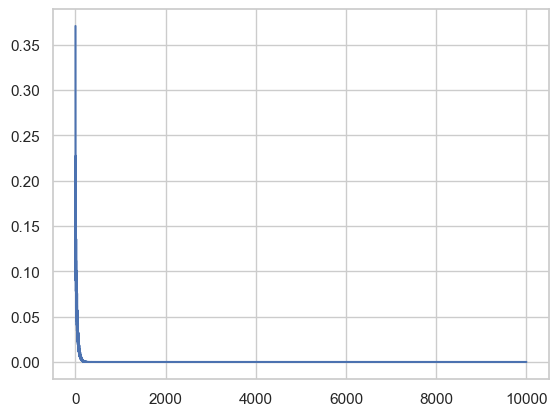

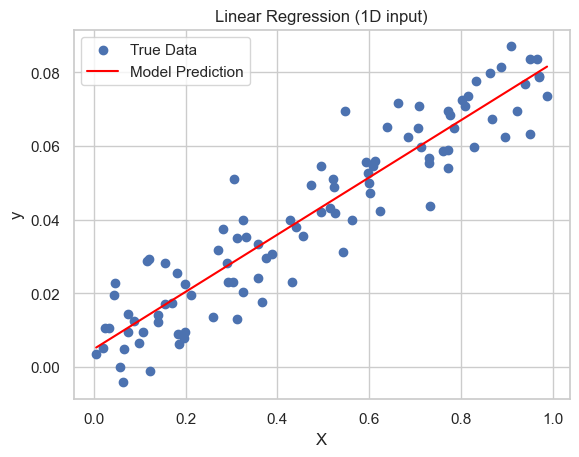

In [7]:

# Génère des données en 1D ou 2D ou 3D
X, y, true_weights = mltools.generate_linreg_data(n_samples=100, input_dim=1, noise=0.01)

# Crée le modèle et la loss
model = mod.Linear(input_dim=X.shape[1], output_dim=1)
loss_fn = mod.MSELoss()

# Entraîne le modèle
losses = train_reg(model, loss_fn, X, y, lr=0.01, n_epochs=1000)

mltools.plot_loss(losses)
mltools.plot_2d_predictions(X, y, model)


Epoch 0: Loss = 0.4709
Epoch 100: Loss = 0.0006
Epoch 200: Loss = 0.0000
Epoch 300: Loss = 0.0000
Epoch 400: Loss = 0.0000
Epoch 500: Loss = 0.0000
Epoch 600: Loss = 0.0000
Epoch 700: Loss = 0.0000
Epoch 800: Loss = 0.0000
Epoch 900: Loss = 0.0000


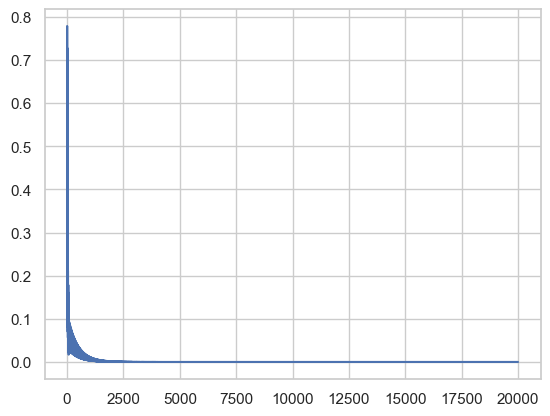

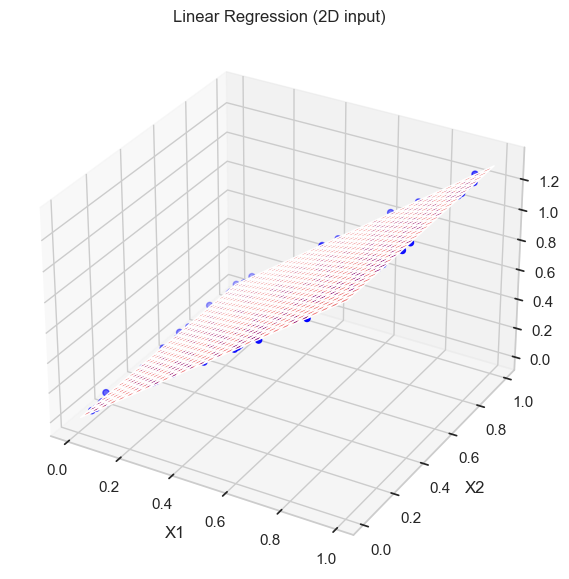

In [8]:

X, y, true_weights = mltools.generate_linreg_data(n_samples=200, input_dim=2, noise=0.01)
model = mod.Linear(input_dim=2, output_dim=1)
loss_fn = mod.MSELoss()

losses = train_reg(model, loss_fn, X, y, lr=0.001, n_epochs=1000)


mltools.plot_loss(losses)
mltools.plot_3d_predictions(X, y, model)

In [11]:
def train(model, loss_fn, X, y, lr=0.1, batch_size=10, n_epochs=1000, verbose=True):
    losses = []
    for epoch in range(n_epochs):
        for i in range(0, X.shape[0], batch_size):
            model.zero_grad()
            X_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            # Forward
            y_pred = model.forward(X_batch)
            loss = loss_fn.forward(y_batch, y_pred)
            mean_loss = np.mean(loss)
            losses.append(mean_loss)

            # Backward
            delta = loss_fn.backward(y_batch, y_pred)
            model.backward_update_gradient(X_batch, delta)

            model.update_parameters(lr)

        if verbose and epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {mean_loss:.4f}")

    return losses

Epoch 0: Loss = 0.2490
Epoch 100: Loss = 0.0019
Epoch 200: Loss = 0.0013
Epoch 300: Loss = 0.0010
Epoch 400: Loss = 0.0009
Epoch 500: Loss = 0.0008
Epoch 600: Loss = 0.0007
Epoch 700: Loss = 0.0006
Epoch 800: Loss = 0.0005
Epoch 900: Loss = 0.0005


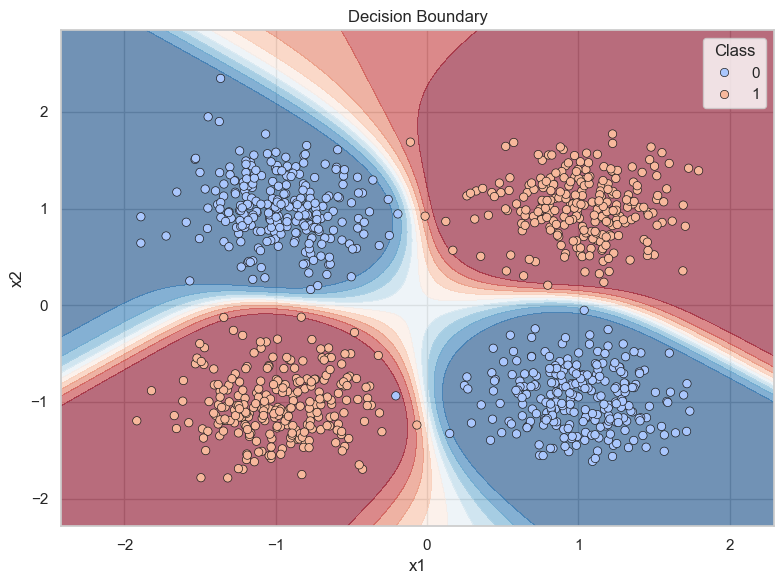

Accuracy: 1.00


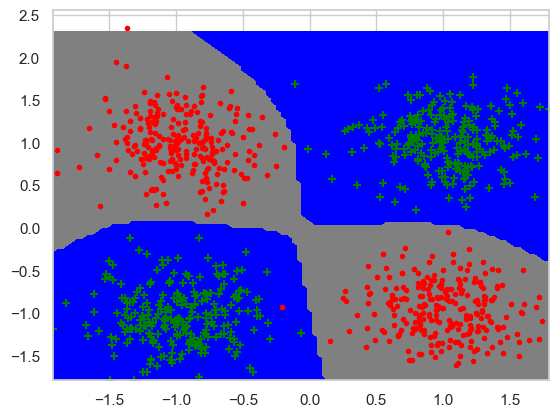

In [12]:
importlib.reload(mod)
importlib.reload(mltools)

model = mod.Sequential([
    mod.Linear(input_dim=2, output_dim=10),
    mod.Tanh(),
    mod.Linear(input_dim=10, output_dim=1),
    mod.Sigmoid()
])

model._debug = False

X, y = mltools.gen_arti(data_type=1)
# X, y = mltools.generate_classification_data(n_samples=1000, noise=0.1, kind='xor')


loss_fn = mod.MSELoss()

losses = train(model, loss_fn, X, y, lr=0.01, n_epochs=1000, batch_size=64)

# mltools.plot_loss(losses)
mltools.plot_decision_boundary(X, y, model)

mltools.plot_frontiere(X, lambda x : (model.forward(x) >= 0.5).astype(int), step=100)
mltools.plot_data(X, y)

y_pred = model.forward(X) > 0.5
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Epoch 0: Loss = 0.3783
Epoch 100: Loss = 0.0735
Epoch 200: Loss = 0.0302
Epoch 300: Loss = 0.0120
Epoch 400: Loss = 0.0027
Epoch 500: Loss = 0.0420
Epoch 600: Loss = 0.0013
Epoch 700: Loss = 0.0027
Epoch 800: Loss = 0.0045
Epoch 900: Loss = 0.0003


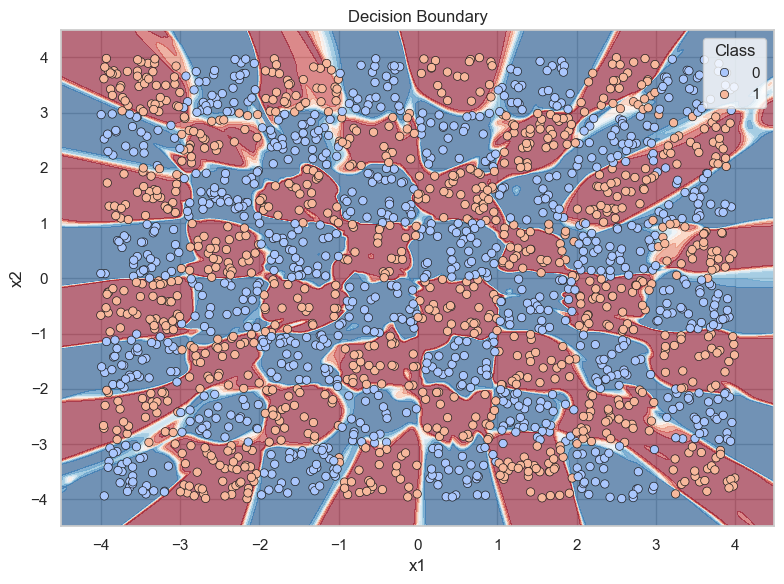

Accuracy: 0.94


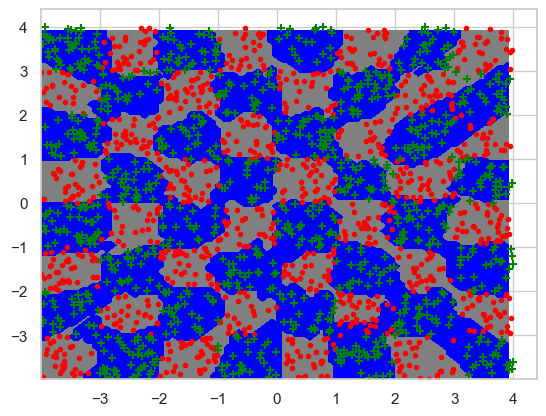

In [33]:
importlib.reload(mod)
importlib.reload(mltools)

model = mod.Sequential([
    mod.Linear(input_dim=2, output_dim=64),
    mod.Tanh(),
    mod.Linear(input_dim=64, output_dim=64),
    mod.Tanh(),
    mod.Linear(input_dim=64, output_dim=64),
    mod.Tanh(),
    mod.Linear(input_dim=64, output_dim=1),
    mod.Sigmoid()
])

model._debug = False

# X, y = mltools.gen_arti(data_type=2)
X, y = mltools.generate_classification_data(n_samples=2000, noise=0.1, kind='chess')


loss_fn = mod.MSELoss()

losses = train(model, loss_fn, X, y, lr=0.01, n_epochs=1000, batch_size=64)

# mltools.plot_loss(losses)
mltools.plot_decision_boundary(X, y, model)

mltools.plot_frontiere(X, lambda x : (model.forward(x) >= 0.5).astype(int), step=100)
mltools.plot_data(X, y)

y_pred = model.forward(X) > 0.5
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Epoch 100/1000, Loss: 0.0021, AUC: 1.0000, Accuracy: 1.0000
Epoch 200/1000, Loss: 0.0025, AUC: 1.0000, Accuracy: 1.0000
Epoch 300/1000, Loss: 0.0130, AUC: 1.0000, Accuracy: 1.0000
Epoch 400/1000, Loss: 0.0010, AUC: 1.0000, Accuracy: 1.0000
Epoch 500/1000, Loss: 0.0006, AUC: 1.0000, Accuracy: 1.0000
Epoch 600/1000, Loss: 0.0018, AUC: 1.0000, Accuracy: 1.0000
Epoch 700/1000, Loss: 0.0006, AUC: 1.0000, Accuracy: 1.0000
Epoch 800/1000, Loss: 0.0002, AUC: 1.0000, Accuracy: 1.0000
Epoch 900/1000, Loss: 0.0001, AUC: 1.0000, Accuracy: 1.0000
Epoch 1000/1000, Loss: 0.0003, AUC: 1.0000, Accuracy: 1.0000


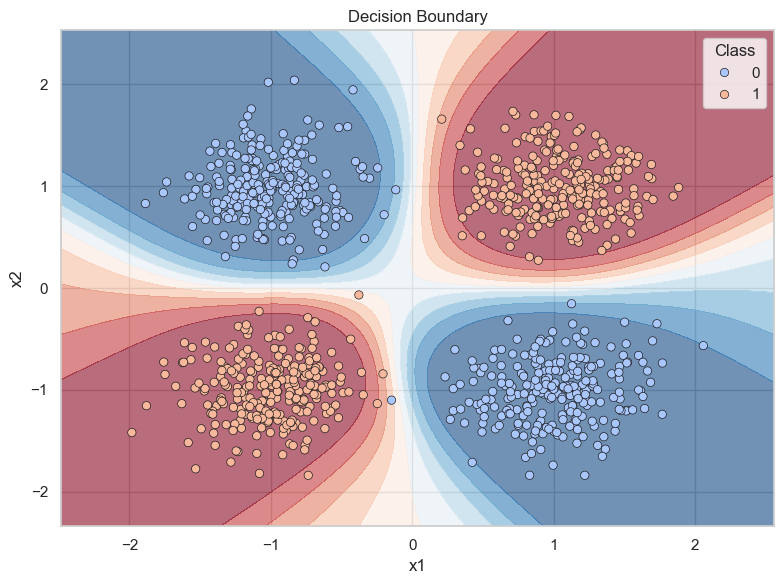

In [18]:
import utils as ut

importlib.reload(ut)

X, y = mltools.gen_arti(data_type=1)

data = ut.Dataset(X, y, 32)

model = mod.Sequential([
    mod.Linear(input_dim=2, output_dim=10),
    mod.Tanh(),
    mod.Linear(input_dim=10, output_dim=1),
    mod.Sigmoid()
])

loss_fn = mod.MSELoss()

optimizer = ut.Optimizer

trainer = ut.Trainer(model, loss_fn, optimizer, data, epochs=1000, lr=0.001)

metrics = [ut.AUC(), ut.Accuracy()]

trainer.train(verbose=True, verbose_step=100, metrics=metrics)
mltools.plot_decision_boundary(X, y, model)

Epoch 100/1000, Loss: 0.1129, AUC: 1.0000, Accuracy: 0.8750
Epoch 200/1000, Loss: 0.0497, AUC: 1.0000, Accuracy: 1.0000
Epoch 300/1000, Loss: 0.0479, AUC: 1.0000, Accuracy: 1.0000
Epoch 400/1000, Loss: 0.0509, AUC: 1.0000, Accuracy: 1.0000
Epoch 500/1000, Loss: 0.0735, AUC: 1.0000, Accuracy: 1.0000
Epoch 600/1000, Loss: 0.0047, AUC: 1.0000, Accuracy: 1.0000
Epoch 700/1000, Loss: 0.0096, AUC: 1.0000, Accuracy: 1.0000
Epoch 800/1000, Loss: 0.0453, AUC: 1.0000, Accuracy: 1.0000
Epoch 900/1000, Loss: 0.0352, AUC: 1.0000, Accuracy: 1.0000
Epoch 1000/1000, Loss: 0.0014, AUC: 1.0000, Accuracy: 1.0000


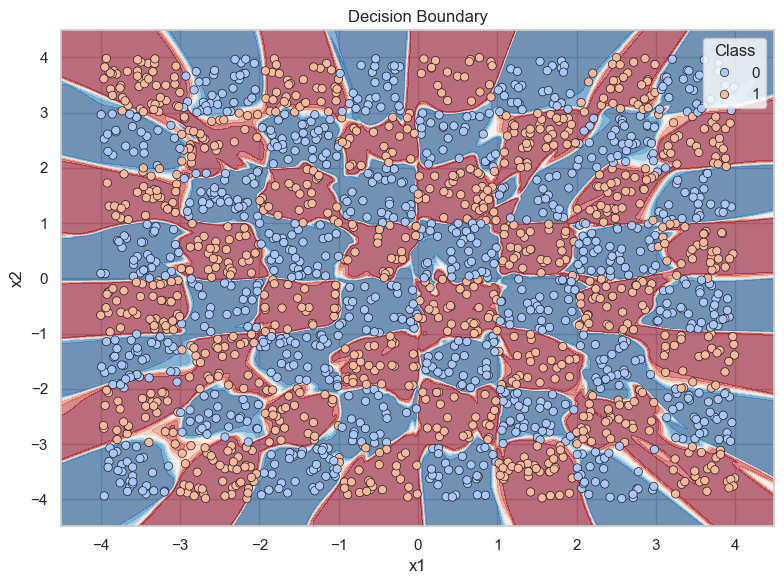

In [23]:


model = mod.Sequential([
    mod.Linear(input_dim=2, output_dim=64),
    mod.Tanh(),
    mod.Linear(input_dim=64, output_dim=64),
    mod.Tanh(),
    mod.Linear(input_dim=64, output_dim=64),
    mod.Tanh(),
    mod.Linear(input_dim=64, output_dim=1),
    mod.Sigmoid()
])

X, y = mltools.generate_classification_data(n_samples=2000, noise=0.1, kind='chess')

data = ut.Dataset(X, y, 64)

loss_fn = mod.MSELoss()

trainer = ut.Trainer(model, loss_fn, ut.Optimizer, data, epochs=1000, lr=0.01)

metrics = [ut.AUC(), ut.Accuracy()]
trainer.train(verbose=True, verbose_step=100, metrics=metrics)
mltools.plot_decision_boundary(X, y, model)


Epoch 100/1000, Loss: 0.0690, AUC: 1.0000, Accuracy: 0.9583
Validation Loss: 0.0993, AUC: 1.0000, Accuracy: 1.0000
Epoch 200/1000, Loss: 0.0490, AUC: 1.0000, Accuracy: 1.0000
Validation Loss: 0.0312, AUC: 1.0000, Accuracy: 1.0000
Epoch 300/1000, Loss: 0.0507, AUC: 1.0000, Accuracy: 1.0000
Validation Loss: 0.0415, AUC: 1.0000, Accuracy: 1.0000
Epoch 400/1000, Loss: 0.0452, AUC: 1.0000, Accuracy: 1.0000
Validation Loss: 0.0349, AUC: 1.0000, Accuracy: 1.0000
Epoch 500/1000, Loss: 0.0041, AUC: 1.0000, Accuracy: 1.0000
Validation Loss: 0.0969, AUC: 0.9429, Accuracy: 0.9167
Epoch 600/1000, Loss: 0.0321, AUC: 1.0000, Accuracy: 1.0000
Validation Loss: 0.1972, AUC: 1.0000, Accuracy: 0.8333
Epoch 700/1000, Loss: 0.0330, AUC: 1.0000, Accuracy: 0.9583
Validation Loss: 0.0619, AUC: 1.0000, Accuracy: 1.0000
Epoch 800/1000, Loss: 0.0066, AUC: 1.0000, Accuracy: 1.0000
Validation Loss: 0.0861, AUC: 1.0000, Accuracy: 0.9167
Epoch 900/1000, Loss: 0.1024, AUC: 1.0000, Accuracy: 1.0000
Validation Loss: 0.1

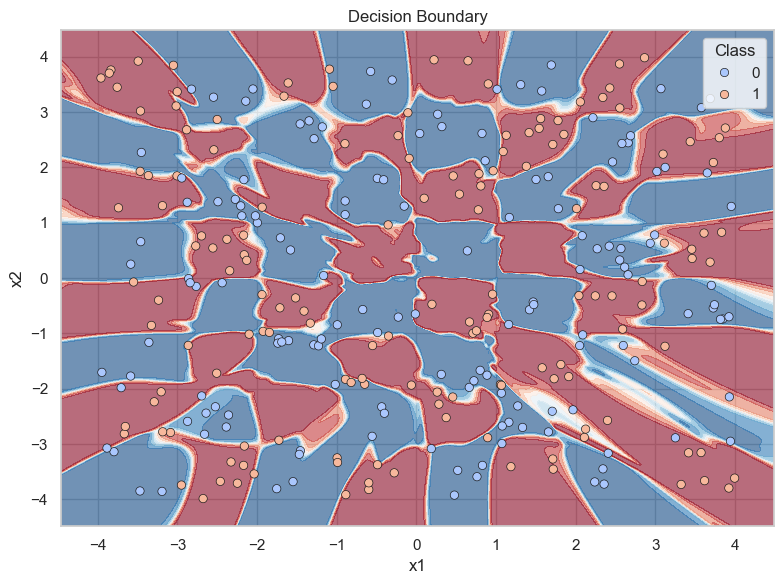

Test , AUC: 0.9024, Accuracy: 0.8333


In [30]:
importlib.reload(ut)

model = mod.Sequential([
    mod.Linear(input_dim=2, output_dim=64),
    mod.Tanh(),
    mod.Linear(input_dim=64, output_dim=64),
    mod.Tanh(),
    mod.Linear(input_dim=64, output_dim=64),
    mod.Tanh(),
    mod.Linear(input_dim=64, output_dim=1),
    mod.Sigmoid()
])

loss_fn = mod.MSELoss()

X, y = mltools.generate_classification_data(n_samples=2000, noise=0.1, kind='chess')

train_data, val_data, test_data = ut.get_dataset_split(X, y, test_size=0.15, val_size=0.15)

trainer = ut.Trainer(model, loss_fn, ut.Optimizer, train_data, val_data, test_data, epochs=1000, lr=0.01)
metrics = [ut.AUC(), ut.Accuracy()]

trainer.train(verbose=True, verbose_step=100, metrics=metrics, valid_epoch=100)
mltools.plot_decision_boundary(test_data.X, test_data.y, model)

trainer.test(metrics=metrics)
